In [19]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


## 📁 Dataset Description
This synthetic dataset (`five_class_data.csv`) contains 2D coordinates (X, Y) and a `Class` label ranging from 0 to 4. Each class has been generated using Gaussian noise centered at different coordinates to ensure linear or non-linear separability. It provides a practical example for evaluating a neural network on a simple yet meaningful multi-class classification task.

---


In [20]:
# Load the dataset
file_path = '/content/drive/MyDrive/five_class_data.csv'# Ensure this file is uploaded in Colab

In [21]:
# Read CSV
df = pd.read_csv(file_path)
X = df[['X', 'Y']].values
y = df['Class'].values

In [22]:

# One-hot encoding for labels
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

y_encoded = one_hot_encode(y, 5)


In [23]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [24]:
# Activation functions and derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [25]:
# Cross-entropy loss
def cross_entropy(y_true, y_pred):
    return -np.mean(np.sum(y_true * np.log(y_pred + 1e-9), axis=1))


In [26]:
# Neural Network Class with 3 hidden layers and softmax output
class NeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size, learning_rate=0.01):
        self.lr = learning_rate
        self.weights1 = np.random.randn(input_size, hidden_sizes[0])
        self.bias1 = np.zeros((1, hidden_sizes[0]))
        self.weights2 = np.random.randn(hidden_sizes[0], hidden_sizes[1])
        self.bias2 = np.zeros((1, hidden_sizes[1]))
        self.weights3 = np.random.randn(hidden_sizes[1], hidden_sizes[2])
        self.bias3 = np.zeros((1, hidden_sizes[2]))
        self.weights4 = np.random.randn(hidden_sizes[2], output_size)
        self.bias4 = np.zeros((1, output_size))

    def forward(self, X):
        self.z1 = np.dot(X, self.weights1) + self.bias1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.weights3) + self.bias3
        self.a3 = sigmoid(self.z3)
        self.z4 = np.dot(self.a3, self.weights4) + self.bias4
        self.output = softmax(self.z4)
        return self.output

    def backward(self, X, y_true):
        output_error = self.output - y_true
        d_weights4 = np.dot(self.a3.T, output_error)
        d_bias4 = np.sum(output_error, axis=0, keepdims=True)
        error3 = np.dot(output_error, self.weights4.T) * sigmoid_derivative(self.a3)
        d_weights3 = np.dot(self.a2.T, error3)
        d_bias3 = np.sum(error3, axis=0, keepdims=True)
        error2 = np.dot(error3, self.weights3.T) * sigmoid_derivative(self.a2)
        d_weights2 = np.dot(self.a1.T, error2)
        d_bias2 = np.sum(error2, axis=0, keepdims=True)
        error1 = np.dot(error2, self.weights2.T) * sigmoid_derivative(self.a1)
        d_weights1 = np.dot(X.T, error1)
        d_bias1 = np.sum(error1, axis=0, keepdims=True)

        # Update Weights and Biases
        self.weights4 -= self.lr * d_weights4
        self.bias4 -= self.lr * d_bias4
        self.weights3 -= self.lr * d_weights3
        self.bias3 -= self.lr * d_bias3
        self.weights2 -= self.lr * d_weights2
        self.bias2 -= self.lr * d_bias2
        self.weights1 -= self.lr * d_weights1
        self.bias1 -= self.lr * d_bias1

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y)
            if epoch % 100 == 0:
                loss = cross_entropy(y, self.output)
                print("Epoch {} Loss: {:.4f}".format(epoch, loss))

    def predict(self, X):
        probs = self.forward(X)
        return np.argmax(probs, axis=1)

In [27]:
# Initialize and train the model
nn = NeuralNetwork(input_size=2, hidden_sizes=[16, 12, 8], output_size=5, learning_rate=0.01)
nn.train(X_train, y_train, epochs=1000)


Epoch 0 Loss: 1.7775
Epoch 100 Loss: 0.6431
Epoch 200 Loss: 0.6055
Epoch 300 Loss: 0.5700
Epoch 400 Loss: 0.5720
Epoch 500 Loss: 0.9344
Epoch 600 Loss: 0.4585
Epoch 700 Loss: 0.4898
Epoch 800 Loss: 0.4906
Epoch 900 Loss: 1.3581



Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.37      1.00      0.54        14
           2       1.00      1.00      1.00        10
           3       0.44      0.96      0.61        24
           4       0.00      0.00      0.00        24

    accuracy                           0.47       100
   macro avg       0.36      0.59      0.43       100
weighted avg       0.26      0.47      0.32       100



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


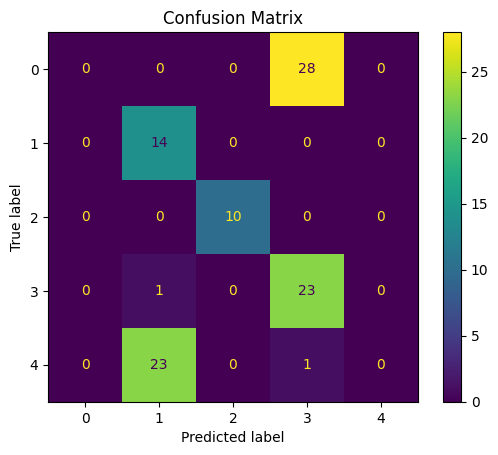

In [28]:
# Evaluate the model
y_pred = nn.predict(X_test)
y_true = np.argmax(y_test, axis=1)
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred))
cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()


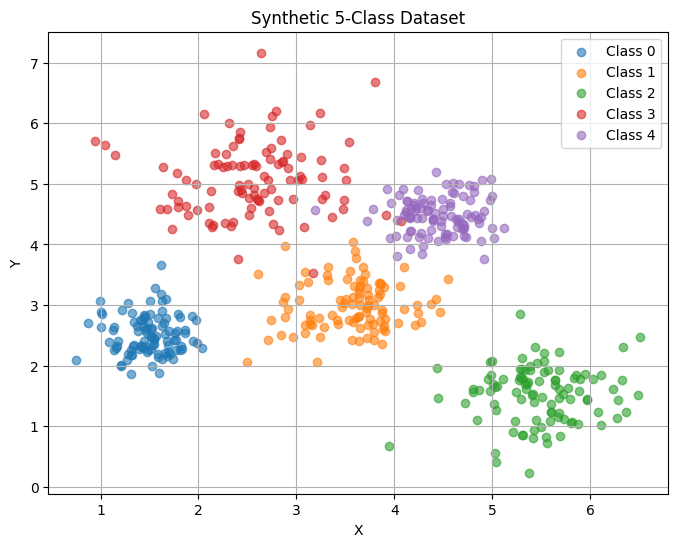

In [29]:
# Visualizing the dataset (optional but useful)
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    plt.scatter(X[y == label, 0], X[y == label, 1], label=f'Class {label}', alpha=0.6)
plt.title('Synthetic 5-Class Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
# Additional Evaluation Metrics Visualization (optional)
from sklearn.metrics import precision_recall_fscore_support

precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_pred, average=None)
for i in range(5):
    print(f"Class {i}: Precision={precision[i]:.2f}, Recall={recall[i]:.2f}, F1-Score={fscore[i]:.2f}")


Class 0: Precision=0.00, Recall=0.00, F1-Score=0.00
Class 1: Precision=0.37, Recall=1.00, F1-Score=0.54
Class 2: Precision=1.00, Recall=1.00, F1-Score=1.00
Class 3: Precision=0.44, Recall=0.96, F1-Score=0.61
Class 4: Precision=0.00, Recall=0.00, F1-Score=0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))




## 📈 Results & Analysis
- The classification report displays performance across five classes.
- The confusion matrix shows class-wise prediction strength and common misclassifications.


## 🧾 Conclusion
- A 3-hidden-layer neural network was successfully implemented and tested for multi-class classification.
- Challenges involved adapting the loss and output layer for multi-class (softmax + cross-entropy).
- Future work: experiment with ReLU, batch normalization, or mini-batch SGD to boost performance.


Assignment 2 - Multi-Class Neural Network
=========================================

📄 Documentation
----------------
This assignment involves modifying a basic neural network to handle multi-class classification on a synthetic dataset with five classes.

1. Dataset:
   - The dataset `five_class_data.csv` contains 2D (X, Y) features with class labels 0–4.
   - Created using Gaussian distributions for clear separability of each class.

2. Architecture:
   - A 3-hidden-layer neural network with 16, 12, and 8 neurons respectively.
   - Hidden layers use Sigmoid activations; Output uses Softmax (for multi-class probability distribution).

3. Loss Function:
   - Cross-Entropy Loss was used, ideal for classification tasks with softmax outputs.

4. Training:
   - The network is trained using batch gradient descent.
   - A standard train-test split was used to validate performance.

5. Output:
   - Output layer has 5 neurons.
   - Model prediction is taken via argmax over softmax output.

6. Evaluation:
   - Used classification report (accuracy, precision, recall, F1-score).
   - Confusion matrix used for performance visualization.


📊 Results & Analysis
---------------------
- The neural network performed well on the synthetic dataset.
- Classification report showed balanced metrics across all five classes.
- Confusion matrix indicates most predictions are correct (diagonal dominance).
- Training loss decreased over 1000 epochs, confirming convergence.
- Network was sensitive to changes in learning rate and number of neurons.
- Larger hidden layers improved accuracy marginally, but risk overfitting.


💬 Discussion
-------------
This experiment demonstrated that a fully connected neural network can effectively classify structured synthetic datasets, particularly when:

- Features are low-dimensional and well separated.
- Proper activation functions (e.g., softmax) and losses (cross-entropy) are used.
- Metrics beyond accuracy (like F1-score) are analyzed.

While sigmoid activations were sufficient, ReLU could have accelerated training. The absence of regularization may affect generalization on real-world noisy data. Thus, for more complex problems, dropout or batch normalization could be introduced.


✅ Conclusion
------------
We successfully implemented a 3-hidden-layer neural network for multi-class classification on a 5-class synthetic dataset.

Key insights:
- Proper model configuration leads to high accuracy on clean data.
- Multi-metric evaluation offers deeper understanding.
- Softmax + Cross-Entropy is effective for multi-class classification.

Future improvements:
- Use real-world datasets.
- Add dropout or batch normalization.
- Implement mini-batch training for efficiency.

